In [2]:
import numpy as np
import matplotlib.cm as cm
from matplotlib import ticker
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import dask
from sklearn.neighbors import KDTree
import netCDF4
from metpy import calc
from metpy.units import units
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
import pandas as pd

from sklearn.cluster import KMeans
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn import metrics

/export/nfs0home/hmangipu/miniconda3/envs/GPU/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [46]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [4]:
values_list = [2,3,4,5,6,7,8,9,10,15,25,50]

In [6]:
V1_icon_spcam_kl = np.load("../compressed_data/icon_spcam_kl.npy")
V1_icon_sam_kl = np.load("../compressed_data/icon_sam_kl.npy")
V1_icon_um_kl = np.load("../compressed_data/icon_um_kl.npy")
V1_icon_ifs_kl = np.load("../compressed_data/icon_ifs_kl.npy")
V1_icon_shield_kl = np.load("../compressed_data/icon_shield_kl.npy")
V1_icon_nicam_kl = np.load("../compressed_data/icon_nicam_kl.npy")
V1_icon_arpege_kl = np.load("../compressed_data/icon_arpege_kl.npy")
V1_icon_gem_kl = np.load("../compressed_data/icon_gem_kl.npy")

V2_icon_spcam_kl = np.load("../compressed_data/V2_icon_spcam_kl.npy")
V2_icon_sam_kl = np.load("../compressed_data/V2_icon_sam_kl.npy")
V2_icon_um_kl = np.load("../compressed_data/V2_icon_um_kl.npy")
V2_icon_ifs_kl = np.load("../compressed_data/V2_icon_ifs_kl.npy")
V2_icon_shield_kl = np.load("../compressed_data/V2_icon_shield_kl.npy")
V2_icon_nicam_kl = np.load("../compressed_data/V2_icon_nicam_kl.npy")
V2_icon_arpege_kl = np.load("../compressed_data/V2_icon_arpege_kl.npy")
V2_icon_gem_kl = np.load("../compressed_data/V2_icon_gem_kl.npy")

V3_icon_spcam_kl = np.load("../compressed_data/V3_icon_spcam_kl.npy")
V3_icon_sam_kl = np.load("../compressed_data/V3_icon_sam_kl.npy")
V3_icon_um_kl = np.load("../compressed_data/V3_icon_um_kl.npy")
V3_icon_ifs_kl = np.load("../compressed_data/V3_icon_ifs_kl.npy")
V3_icon_shield_kl = np.load("../compressed_data/V3_icon_shield_kl.npy")
V3_icon_nicam_kl = np.load("../compressed_data/V3_icon_nicam_kl.npy")
V3_icon_arpege_kl = np.load("../compressed_data/V3_icon_arpege_kl.npy")
V3_icon_gem_kl = np.load("../compressed_data/V3_icon_gem_kl.npy")

V4_icon_spcam_kl = np.load("../compressed_data/V4_icon_spcam_kl.npy")
V4_icon_sam_kl = np.load("../compressed_data/V4_icon_sam_kl.npy")
V4_icon_um_kl = np.load("../compressed_data/V4_icon_um_kl.npy")
V4_icon_ifs_kl = np.load("../compressed_data/V4_icon_ifs_kl.npy")
V4_icon_shield_kl = np.load("../compressed_data/V4_icon_shield_kl.npy")
V4_icon_nicam_kl = np.load("../compressed_data/V4_icon_nicam_kl.npy")
V4_icon_arpege_kl = np.load("../compressed_data/V4_icon_arpege_kl.npy")
V4_icon_gem_kl = np.load("../compressed_data/V4_icon_gem_kl.npy")

V5_icon_spcam_kl = np.load("../compressed_data/V5_icon_spcam_kl.npy")
V5_icon_sam_kl = np.load("../compressed_data/V5_icon_sam_kl.npy")
V5_icon_um_kl = np.load("../compressed_data/V5_icon_um_kl.npy")
V5_icon_ifs_kl = np.load("../compressed_data/V5_icon_ifs_kl.npy")
V5_icon_shield_kl = np.load("../compressed_data/V5_icon_shield_kl.npy")
V5_icon_nicam_kl = np.load("../compressed_data/V5_icon_nicam_kl.npy")
V5_icon_arpege_kl = np.load("../compressed_data/V5_icon_arpege_kl.npy")
V5_icon_gem_kl = np.load("../compressed_data/V5_icon_gem_kl.npy")

In [7]:
icon_spcam_kl = np.mean(np.array([V1_icon_spcam_kl,V2_icon_spcam_kl,V3_icon_spcam_kl,V4_icon_spcam_kl,V5_icon_spcam_kl]),axis=0)
icon_sam_kl = np.mean(np.array([V1_icon_sam_kl,V2_icon_sam_kl,V3_icon_sam_kl,V4_icon_sam_kl,V5_icon_sam_kl]),axis=0)
icon_um_kl = np.mean(np.array([V1_icon_um_kl,V2_icon_um_kl,V3_icon_um_kl,V4_icon_um_kl,V5_icon_um_kl]),axis=0)
icon_ifs_kl = np.mean(np.array([V1_icon_ifs_kl,V2_icon_ifs_kl,V3_icon_ifs_kl,V4_icon_ifs_kl,V5_icon_ifs_kl]),axis=0)
icon_shield_kl = np.mean(np.array([V1_icon_shield_kl,V2_icon_shield_kl,V3_icon_shield_kl,V4_icon_shield_kl,V5_icon_shield_kl]),axis=0)
icon_nicam_kl = np.mean(np.array([V1_icon_nicam_kl,V2_icon_nicam_kl,V3_icon_nicam_kl,V4_icon_nicam_kl,V5_icon_nicam_kl]),axis=0)
icon_arpege_kl = np.mean(np.array([V1_icon_arpege_kl,V2_icon_arpege_kl,V3_icon_arpege_kl,V4_icon_arpege_kl,V5_icon_arpege_kl]),axis=0)
icon_gem_kl = np.mean(np.array([V1_icon_gem_kl,V2_icon_gem_kl,V3_icon_gem_kl,V4_icon_gem_kl,V5_icon_gem_kl]),axis=0)

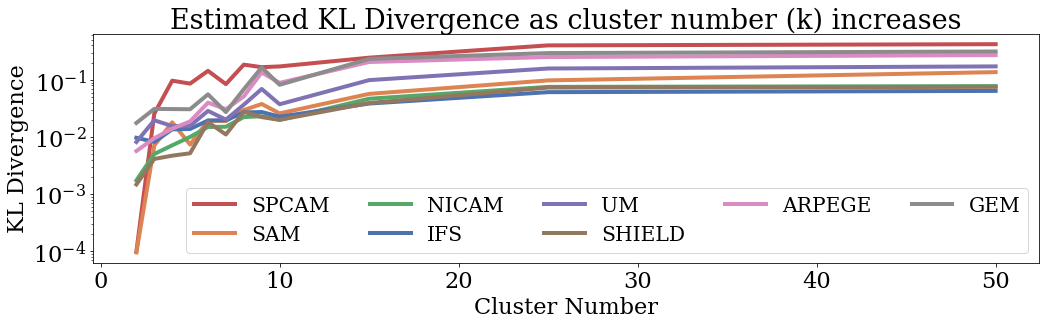

In [48]:
import seaborn as sns


fig, ax = plt.subplots(figsize=(15, 5))

numCurves = 8

colors = sns.color_palette("deep", 8)

ax.plot(values_list, icon_spcam_kl, color=colors[3], label="SPCAM")
ax.plot(values_list, icon_sam_kl, color=colors[1], label="SAM")
ax.plot(values_list, icon_nicam_kl, color=colors[2], label="NICAM")
ax.plot(values_list, icon_ifs_kl, color=colors[0], label="IFS")
ax.plot(values_list, icon_um_kl, color=colors[4], label="UM")
ax.plot(values_list, icon_shield_kl, color=colors[5], label="SHIELD")
ax.plot(values_list, icon_arpege_kl, color=colors[6], label="ARPEGE")
ax.plot(values_list, icon_gem_kl, color=colors[7], label="GEM")

ax.set_title("Estimated KL Divergence as cluster number (k) increases")
ax.set_xlabel("Cluster Number")
ax.set_ylabel("KL Divergence")

plt.legend(loc="lower right", ncol=5 ,fontsize=fz*.9)

ax.set_yscale("log")
plt.tight_layout()
#plt.suptitle("Estimated KL Divergence as cluster number (K) increases")
plt.savefig("../Figures/Figure_7.png", bbox_inches='tight',pad_inches = 0.02)
plt.savefig("../Figures/Figure_7.pdf", bbox_inches='tight',pad_inches = 0.02)